In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (32, 16)

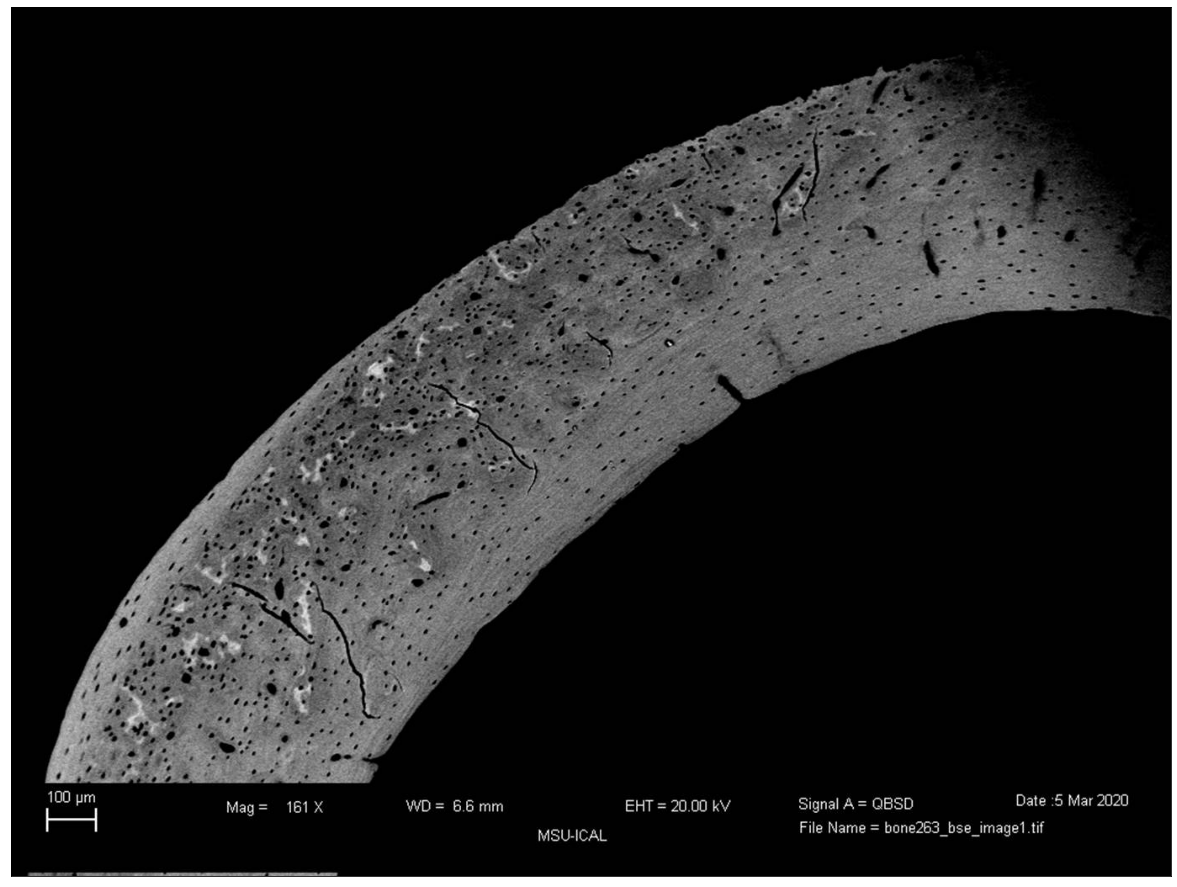

In [2]:
img = cv.imread('images/test.jpg', 0)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

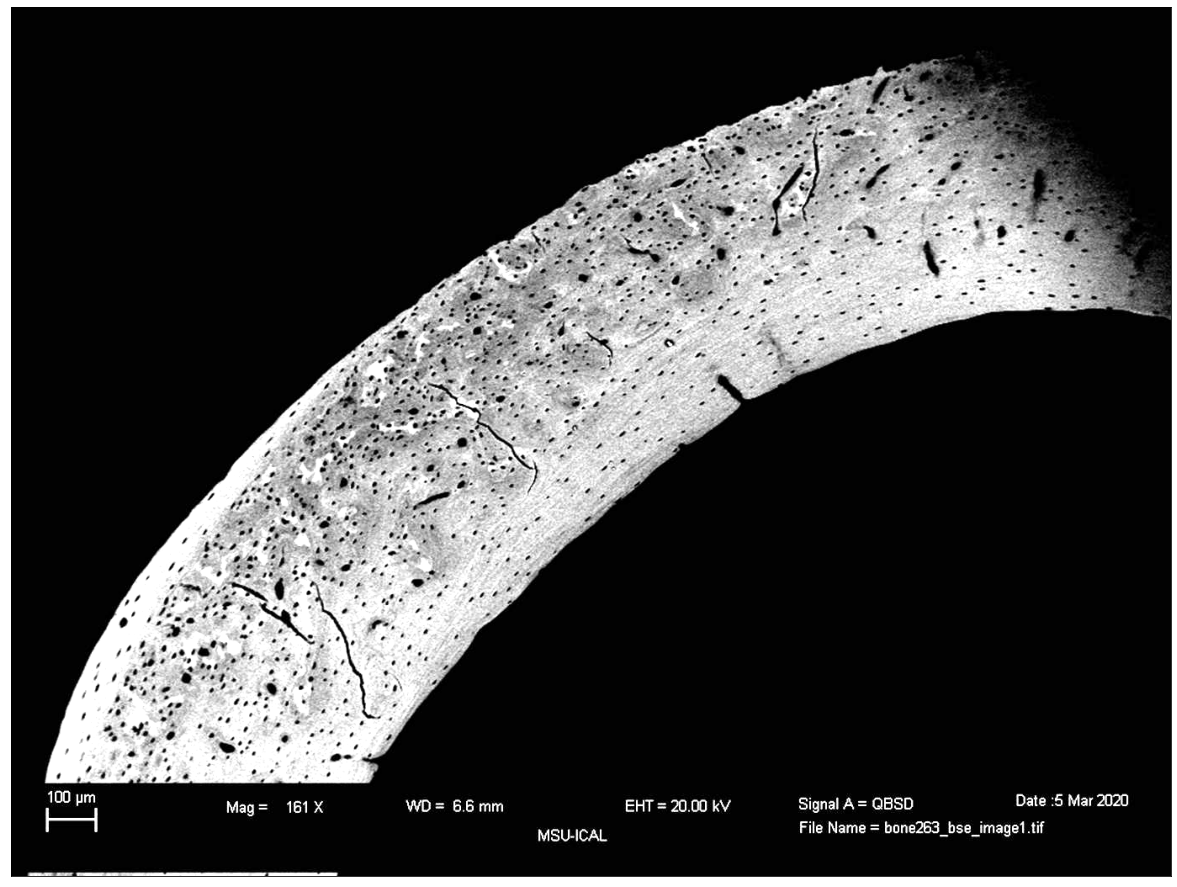

In [38]:
ret,truncd = cv.threshold(img,127,255,cv.THRESH_TRUNC)

plt.imshow(truncd, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

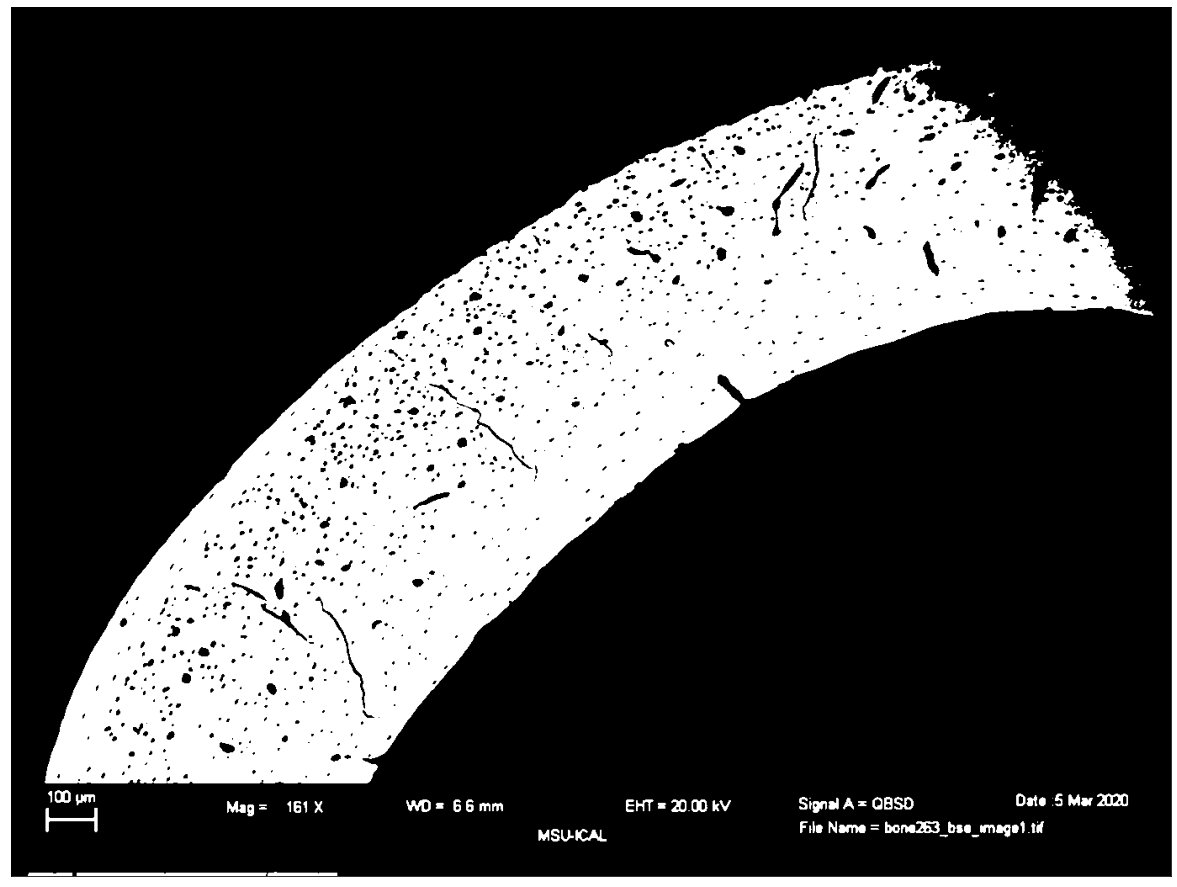

In [39]:
blur = cv.GaussianBlur(truncd,(5,5),0)
ret3,otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

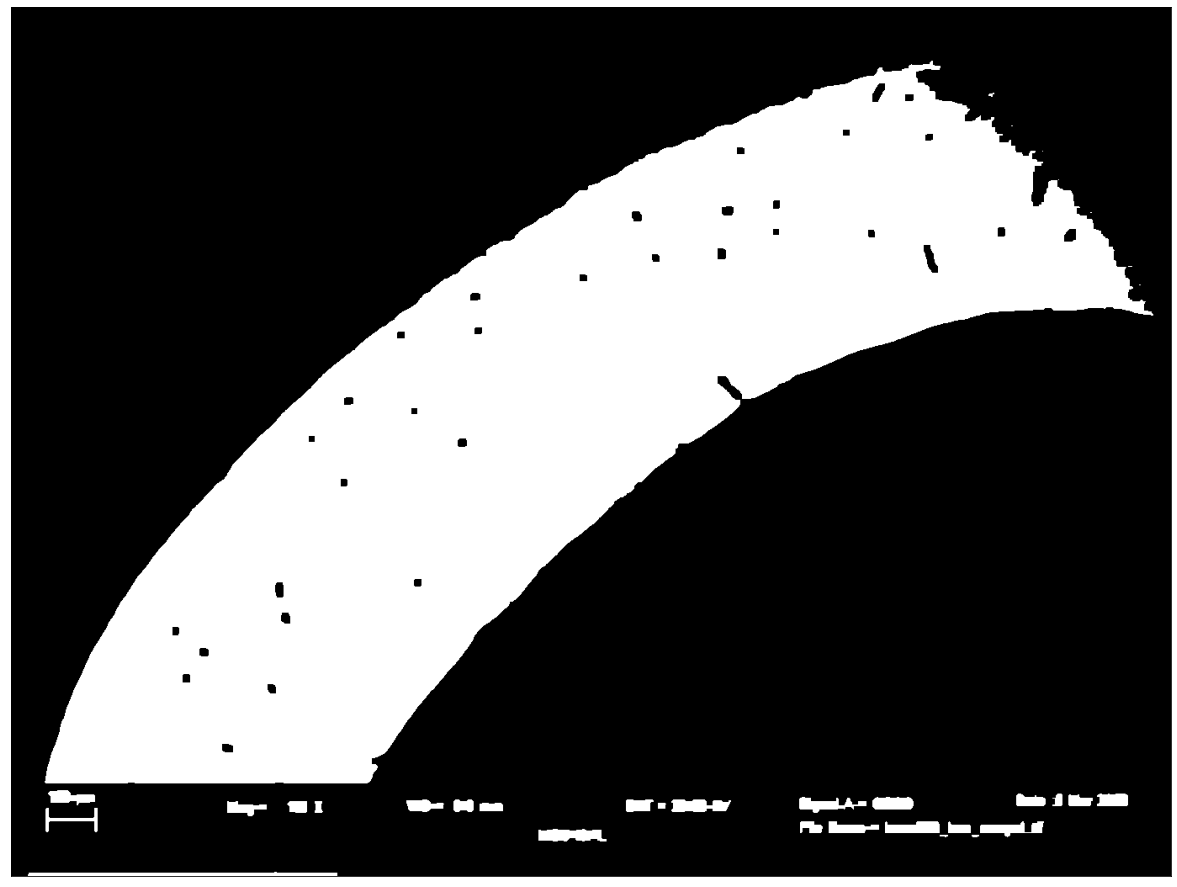

In [40]:
kernel = np.ones((7,7),np.uint8)
closing = cv.morphologyEx(otsu, cv.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [41]:
contours, hierarchy = cv.findContours(closing,
                                      cv.RETR_EXTERNAL,
                                      cv.CHAIN_APPROX_TC89_L1)

areas = [cv.contourArea(c) for c in contours]
max_index = np.argmax(areas)
print(max_index)

33


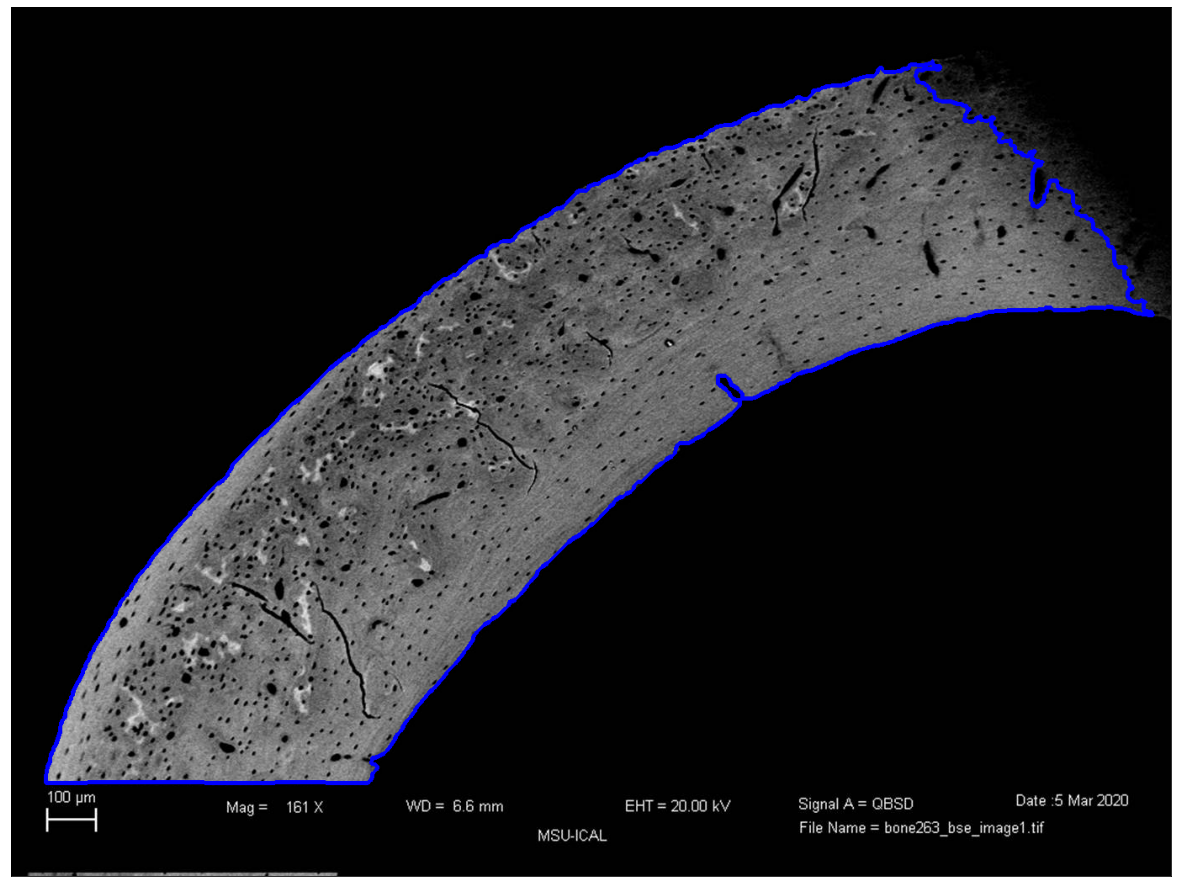

In [42]:
color_img = cv.imread('images/test.jpg')

out = cv.drawContours(color_img, contours, max_index, (0,0,255), 3)
plt.imshow(out)
plt.xticks([]), plt.yticks([])
plt.show()

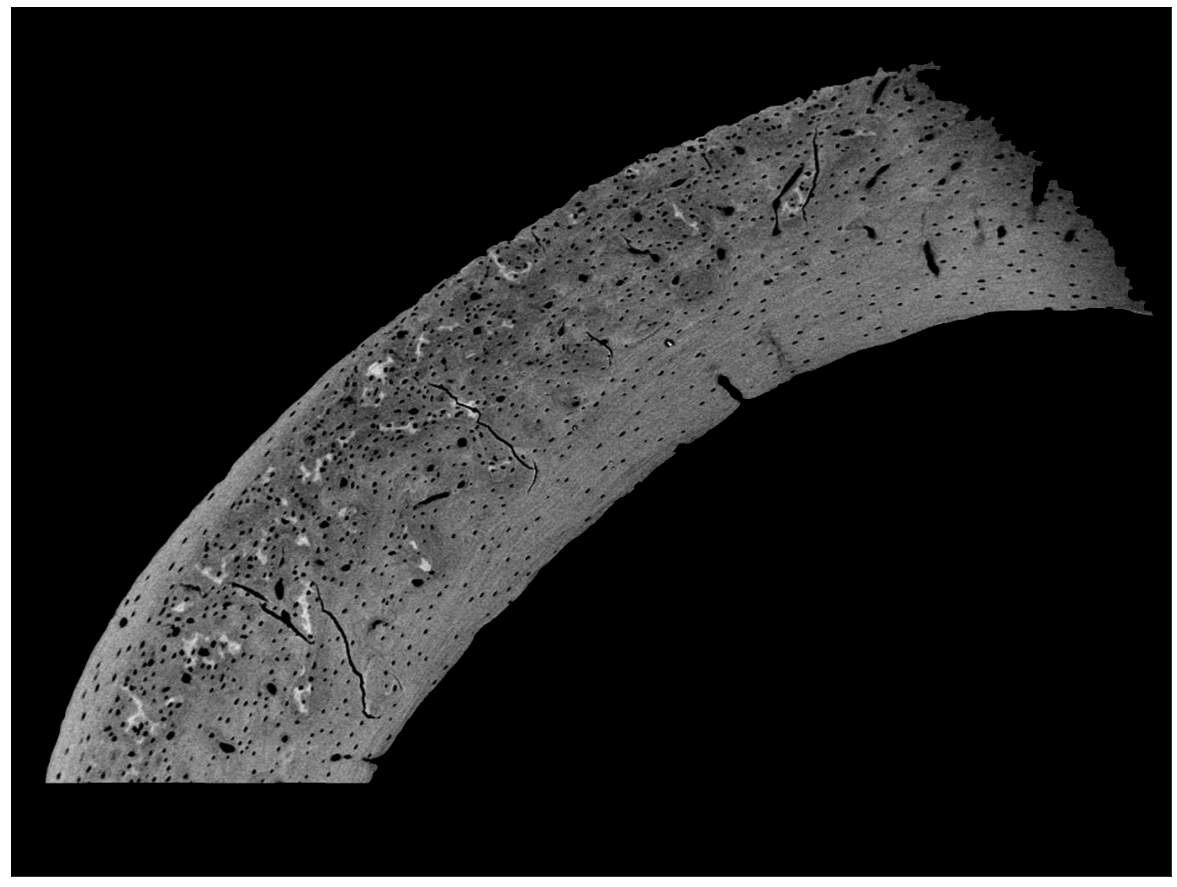

In [43]:
color_img = cv.imread('images/test.jpg')

bone = contours[max_index]

fill_color = [0,0,0]
mask_value = 255

stencil = np.zeros(color_img.shape[:-1]).astype(np.uint8)
cv.fillPoly(stencil, [bone], mask_value)

sel = (stencil != mask_value)
color_img[sel] = fill_color

plt.imshow(color_img)
plt.xticks([]), plt.yticks([])
plt.show()

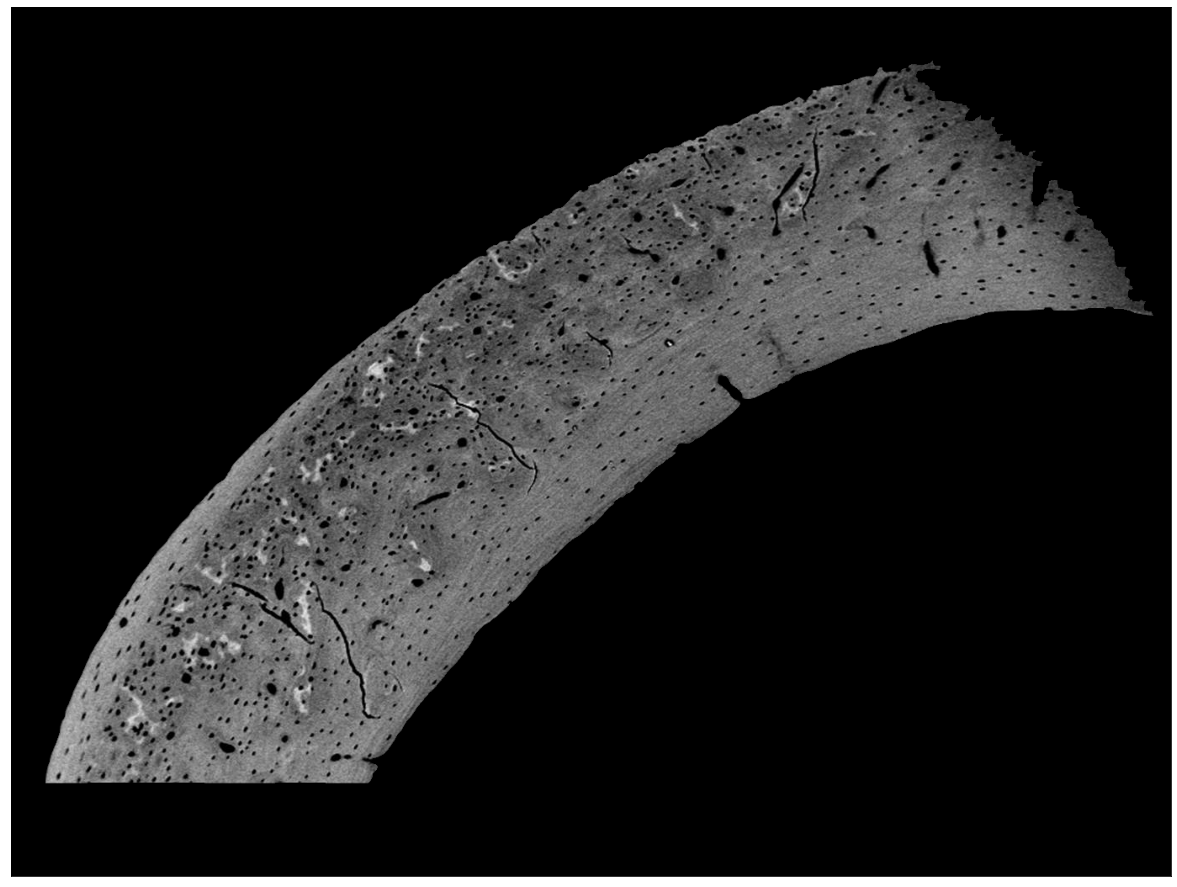

In [44]:
grayscale_filtered = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)

plt.imshow(grayscale_filtered, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

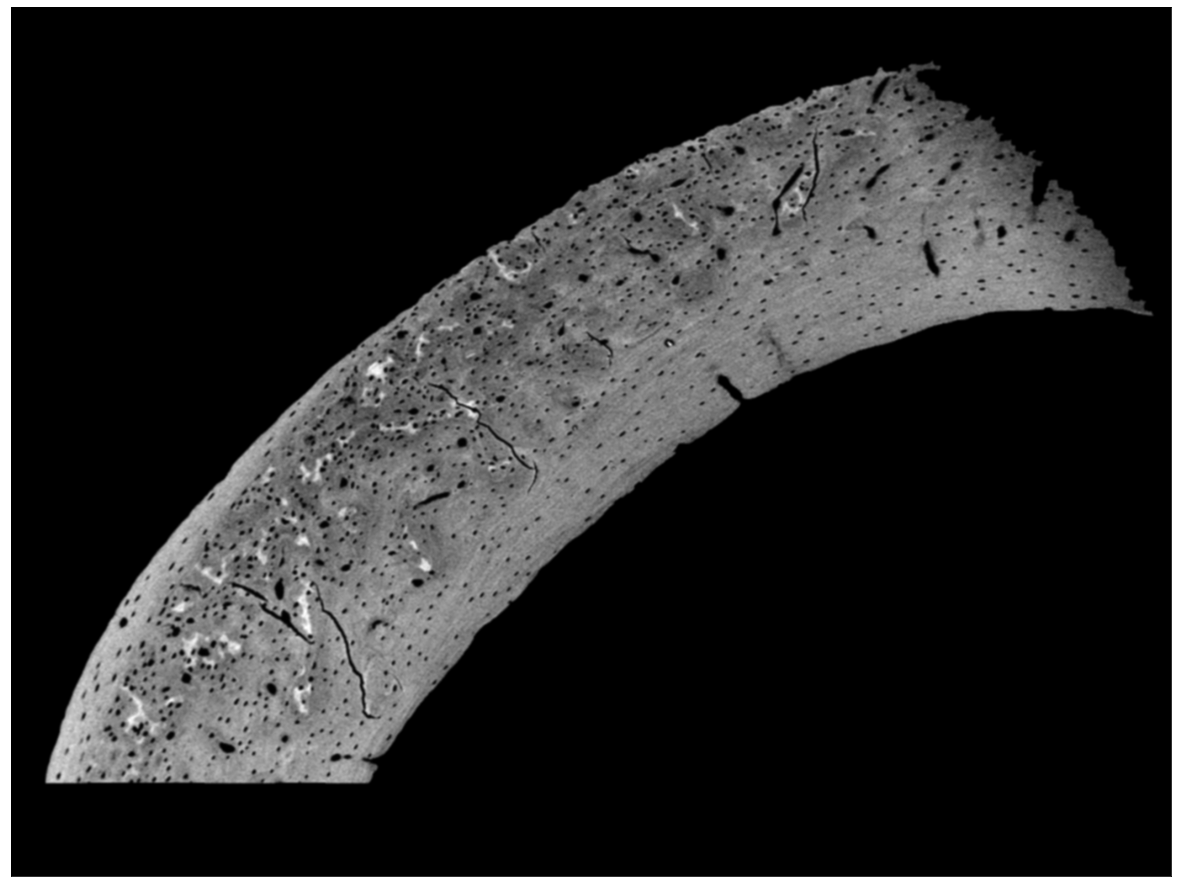

In [45]:
blur = cv.GaussianBlur(grayscale_filtered,(5,5),0)

plt.imshow(blur, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()